In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [63]:
energy, dos, idos = np.loadtxt("../DM_high_P/gap_DM_a_3.0_test.dos",unpack=True)
dos_df = pd.DataFrame({'E (eV)': energy, 'dos(E)': dos, 'Int dos(E)': idos})
dos_df

,E (eV),dos(E),Int dos(E)
0,-10.00,0.0000,0.00
1,-9.99,0.0000,0.00
2,-9.98,0.0000,0.00
3,-9.97,0.0000,0.00
4,-9.96,0.0000,0.00
...,...,...,...
5996,49.96,0.3452,15.98
5997,49.97,0.3451,15.98
5998,49.98,0.3450,15.99
5999,49.99,0.3449,15.99


In [80]:
dos_f = pd.read_table("../DM_high_P/gap_DM_a_3.0_test.dos", delimiter=" ", header=None)
E_fermi = float(dos_f[17][0])
print('E_fermi: ', E_fermi, 'eV')

E_fermi:  27.569 eV


In [81]:
dos_df.insert(1, "E-Ef (eV)", dos_df["E (eV)"]-E_fermi, True)
dos_df

,E (eV),E-Ef (eV),dos(E),Int dos(E)
0,-10.00,-37.569,0.0000,0.00
1,-9.99,-37.559,0.0000,0.00
2,-9.98,-37.549,0.0000,0.00
3,-9.97,-37.539,0.0000,0.00
4,-9.96,-37.529,0.0000,0.00
...,...,...,...,...
5996,49.96,22.391,0.3452,15.98
5997,49.97,22.401,0.3451,15.98
5998,49.98,22.411,0.3450,15.99
5999,49.99,22.421,0.3449,15.99


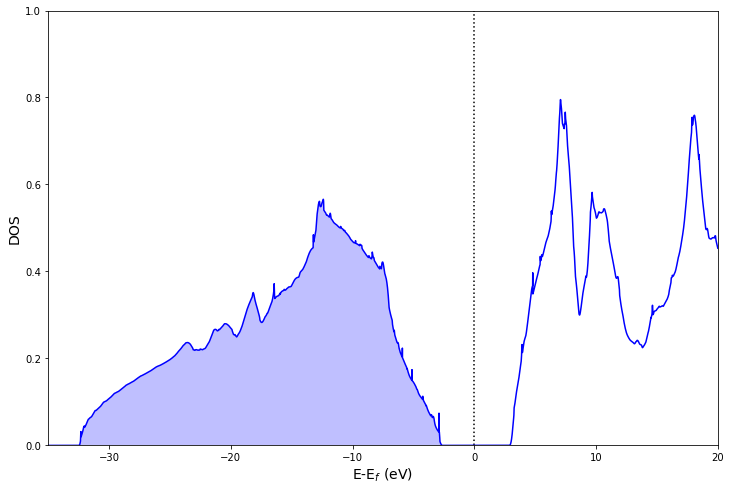

In [89]:
fig = plt.figure(figsize=(12,8))

plt.plot(dos_df['E-Ef (eV)'],dos_df['dos(E)'],color='b')
plt.xlabel('E-E$_f$ (eV)',size=14)
plt.ylabel('DOS',size=14)
plt.xlim(-35,20)
plt.ylim(0,1)
plt.vlines(0, 0, 1, color='k', linestyle=':')
plt.fill_between(dos_df['E-Ef (eV)'], 0, dos_df['dos(E)'], where=(dos_df['E-Ef (eV)'] < 0), facecolor='b', alpha=0.25)